# Performance of LeNet-5

In [3]:
% matplotlib inline

import os
import matplotlib.pyplot as plt

from tests.other.googlenet.util import ExpResults

## Parameters and definitions

In [4]:
log_dir = '/home/rbodo/.snntoolbox/data/mnist/cnn/lenet5/log'
runlabel_analog = '01'
path_analog = os.path.join(log_dir, 'gui', runlabel_analog)

In [17]:
exp_analog = ExpResults(path_analog, 'top-1', '.')
experiments = [exp_analog]

## Plot error vs operations

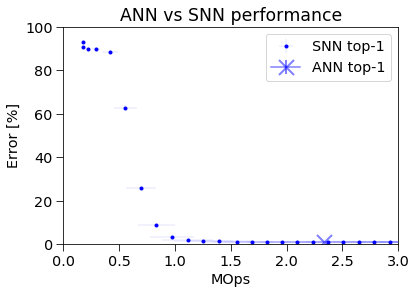

In [25]:
show_numbers = False

exp = experiments[0]

plt.errorbar(exp.mean_computations_t, exp.e1_mean, xerr=exp.std_computations_t,
             yerr=exp.e1_confidence95, fmt=exp.marker, label='SNN '+exp.label, capsize=0, elinewidth=0.1, color=exp.color1)

plt.errorbar(exp.operations_ann, exp.e1_ann, marker='x', label='ANN '+exp.label, color=exp.color1, markersize=15,
             yerr=exp.e1_confidence95_ann, elinewidth=2, capthick=2, markeredgewidth=2, alpha=0.5)

if show_numbers:
    plt.annotate('({:.2f}, {:.2f})'.format(exp.operations_ann, exp.e1_ann), xy=(exp.operations_ann - 0.15, exp.e1_ann + 10), color=exp.color1)
    plt.annotate('({:.2f}, {:.2f})'.format(exp.op1_optimal, exp.e1_optimal), xy=(exp.op1_optimal, exp.e1_optimal),
                 xytext=(exp.op1_optimal, exp.e1_optimal + 10),
                 arrowprops=dict(color=exp.color1, shrink=0.05, width=5, headwidth=10), color=exp.color1)

plt.ylim(0, 100)
plt.xlim(0, 3)
plt.ylabel('Error [%]')
plt.xlabel('MOps')
plt.legend(loc='upper right')
plt.title('ANN vs SNN performance')
plt.savefig(os.path.join(log_dir, 'err_vs_ops'), bbox_inches='tight')

In [24]:
for exp in experiments:
    print('SNN {}: ({:.2f} MOps/frame, {:.2f} %)'.format(exp.label, exp.op1_0, exp.e1_0))
    print('SNN {}: ({:.2f} MOps/frame, {:.2f} %)'.format(exp.label, exp.op1_optimal, exp.e1_optimal))
    print('ANN {}: ({:.2f} MOps/frame, {:.2f} %)'.format(exp.label, exp.operations_ann, exp.e1_ann))

SNN top-1: (3.50 MOps/frame, 0.95 %)


AttributeError: 'ExpResults' object has no attribute 'op1_optimal'